# Interpolação trigonométrica: Séries de Fourier, DFT e FFT

 * Até agora usamos polinômios para aproximar e interpolar
 * Outra possibilidade: senos e cossenos
 * Extremamente versátil e poderoso
 * Usado em eqs. diferenciais, análise matemática, funções aleatórias, etc, etc, etc ...

## Polinômio trigonométrico
\begin{align}
S_N(x) = \frac{a_0}{2} +& a_1 \cos\left(\frac{2\pi x}{L_0}\right) + a_2\cos\left(\frac{4\pi x}{L_0}\right) + \cdots + a_N\cos\left(\frac{2\pi n  x}{L_0}\right) + \\ 
&b_1 \sin\left(\frac{2\pi x}{L_0}\right) + b_2\sin\left(\frac{4\pi x}{L_0}\right) + \cdots + b_N\sin\left(\frac{2\pi N  x}{L_0}\right)
\end{align}

Nesta equação, $T_0$ é o período da função.

O que temos é uma base $\phi_n(t)$ com $2N+1$ termos:
\begin{align}
\phi_0(x) &= \frac{1}{2}\\
\phi_n(x) &= \cos\left(\frac{2\pi n x}{L_0}\right) \qquad 0\le n \le N \\
\phi_{n+N}(x) &= \sin\left(\frac{2\pi n x}{L_0}\right) \qquad 1\le n \le N 
\end{align}


## Como calcular os coeficientes $a_i$ e $b_i$??? 
**Ortogonalidade de senos e cossenos**

\begin{align}
\int_{-L_0/2}^{L_0/2} \cos\left(\frac{2\pi n x}{L_0}\right) \cdot \cos\left(\frac{2\pi m x}{L_0}\right) \: dx &= \left\{\begin{matrix}0 \quad n\neq m\\ \frac{L_0}{2} \quad n=m\end{matrix}\right.\\
\int_{-L_0/2}^{L_0/2} \sin\left(\frac{2\pi n x}{L_0}\right) \cdot \sin\left(\frac{2\pi m x}{L_0}\right) \: dx &= \left\{\begin{matrix}0 \quad n\neq m\\ \frac{L_0}{2} \quad n=m\end{matrix}\right.\\
\int_{-L_0/2}^{L_0/2} \cos\left(\frac{2\pi n x}{L_0}\right) \cdot \sin\left(\frac{2\pi m x}{T_0}\right) \: dx &= 0\\
\end{align}



## Como calcular os coeficientes?

\begin{align}
a_n &= \frac{2}{L_0}\int_{-L_0/2}^{L_0/2} y(x) \cdot \cos\left(\frac{2\pi n x}{L_0}\right)\: dx \\
b_m &= \frac{2}{L_0}\int_{-L_0/2}^{L_0} y(x) \cdot \sin\left(\frac{2\pi m x}{L_0}\right)\: dx \\
\end{align}



## Exemplo: $y(x) = |x|, -1 \le x \le 1$ ($L_0 = 2$)
\begin{align}
a_0 &= 2\int_0^1 x\:dx \qquad a_0 = 1\\
a_n &= 2\int_0^1 \cos\left(\frac{2\pi n x}{2}\right)\:dx \qquad a_n = \frac{2}{\pi^2 n^2}\cdot\left[(-1)^n - 1\right] \\
b_n &= 0
\end{align}

## Usando o SymPy

In [1]:
using SymPy
x = symbols("x", real=true)
n = symbols("n", integer=true, positive=true)
a0f  =  2 * integrate(x, (x, 0, 1))
anf = 2 * integrate(x * cos(2PI*n*x/2), (x, 0, 1))

      n        
2⋅(-1)      2  
─────── - ─────
  2  2     2  2
 π ⋅n     π ⋅n 

In [2]:
function abst(t, n)
    x = 1.0/2
    for i in 1:2:n
        ai = 2/(π*i)^2 * ((-1)^i - 1)
        x += ai * cos(π*i*t)
    end
    return x
end

abst (generic function with 1 method)

In [3]:
using PyPlot

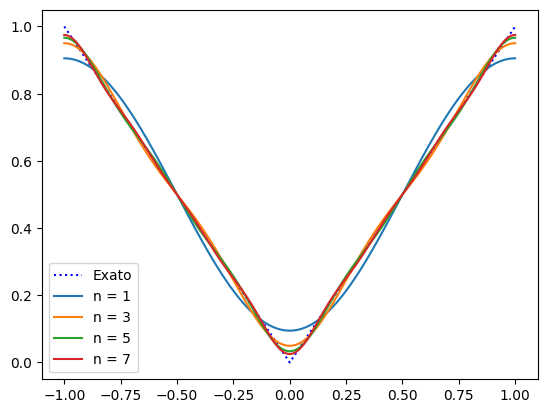

PyObject <matplotlib.legend.Legend object at 0x7fdcb5038160>

In [4]:
xx = -1:0.002:1; yy = abs.(xx); y1 = abst.(xx, 1); y3 = abst.(xx, 3); y5 = abst.(xx, 5); y7 = abst.(xx, 7);
plot(xx, yy, "b:", label="Exato"); plot(xx, y1, label="n = 1"); plot(xx, y3, label="n = 3"); 
plot(xx, y5, label="n = 5"); plot(xx, y7, label="n = 7"); legend()

## Vamos generalizar?

Imagine que queremos aproximar $u(x)$ usando uma base ortogonal $\phi_n(x)$ com $1 \le n \le N$ no domínio $a \le x \le b$:
$$
u(x) \approx u^\delta(x) = \sum_{n=1}^N \hat{u}_n \phi_n(x)
$$
O erro da aproximação vale:
$$
\varepsilon(x) = u^\delta(x) - (x) \quad\longrightarrow\quad \varepsilon^2 = \int_a^b w(x)\left[ u^\delta(x) - u(x) \right]^2\:dx
$$

Nesta equação, $w(x)$ é uma função de peso que agora vamos considerar constante e igual a 1.


## Mínimos quadrados.
$$
\varepsilon^2 = f(\hat{u}_1, \ldots, \hat{u}_N)
$$
Para minimizar o erro, fazemos como fizemos na aula anterior:
$$
\frac{\partial \varepsilon^2}{\partial \hat{u}_k} = 0 \quad 1 \le k \le N
$$

Com isso chegamos ao seguinte sistema de equações lineares:
$$
\sum_{j=1}^N \hat{u}_j \int_a^b w(x)\phi_n(x)\phi_k(x)\:dx = \int_a^b w(x)\hat{u}_k u(x)\:dx \qquad 1\le k \le N
$$


## Base ortogonal:

$$
\int_a^b w(x) \phi_j(x) \phi_k(x) \:dx = 
\left\{\begin{matrix} 0 & \quad &  se\: j\ne k \\ \gamma(k) & \quad & se\: j=k\end{matrix}\right.
$$
Quando $\gamma(k) = 1$ para $1\le k \le N$, a base é ortonormal.

Para a função de peso $w(x)=1$ e a base formada com senos e cossenos, recuperamos as equações para $a_n$ e $b_n$ acima.

**Sempre que possível, use bases ortogonais**

Quando não for possível, ainda ajuda usar bases parcialmente ortogonais.

## Mínimos quadrados discreto

Neste caso, com uma base $\phi_n(x)$ com $1\le n \le N$ e com a função $u(x)$ conhecida nos pontos $x_k$, $1 \le k \le Q$, podemos usar o método dos mínimos quadrados:
$$
\varepsilon^2 = \sum_{k=1}^Q w_k\left[u^\delta(x_k) - u(x_k)\right]^2 = \sum_{k=1}^Q w_k\left[\left(\sum_{n=1}^N \hat{u}_n \phi_n(x)\right) - u_k\right]^2
$$

Chegamos ao sistema apresentado na aula anterior:

$$
\left(
\begin{matrix}
\sum_{k=1}^Q w_k\phi_1(x_k)\cdot\phi_1(x_k) & 
\cdots &
\sum_{k=1}^Q w_k\phi_1(x_k)\cdot\phi_N(x_k) \\
\sum_{k=1}^Q w_k\phi_2(x_k)\cdot\phi_1(x_k) & 
\cdots &
\sum_{k=1}^Q w_k\phi_2(x_k)\cdot\phi_N(x_k) \\
\vdots & \ddots & \vdots \\
\sum_{k=1}^Q w_k\phi_N(x_k)\cdot\phi_1(x_k) & 
\cdots &
\sum_{k=1}^Q w_k\phi_N(x_k)\cdot\phi_N(x_k) \\
\end{matrix}\right)
\cdot
\left(\begin{matrix} \hat{u}_1 \\ \hat{u}_2 \\ \vdots \\ \hat{u}_N \end{matrix}\right)
= 
\left(\begin{matrix} \sum_{k=1}^Q w_k u_k \phi_1(x_k) \\ \sum_{k=1}^Q w_k u_k \phi_2(x_k) \\  \vdots \\ \sum_{k=1}^Q w_k u_k \phi_N(x_k)\end{matrix}\right)
$$

Aqui introduzimos a possibilidade de haver um peso $w_k$ para cada ponto.

## Voltando para os polinômios trigonométricos...

### Ortogonalidade discreta
Já vimos que a base dos polinômios trigonométricos é ortogonal, de modo que para $k\ne n$, 
$$
\int_{-L_0/2}^{L_0/2} \phi_n(x) \cdot \phi_k(x) \: dx = 0
$$
Mas podemos aproximar esta integral, chamando $\Delta x = L_0 / Q$
$$
\int_{-L_0/2}^{L_0/2} \phi_n(x) \cdot \phi_k(x) \: dx \approx \Delta x\cdot \sum_{i=0}^Q \phi_n(x_i)\cdot \phi_k(x_i)  \approx 0 \qquad x_i = -\frac{L_0}{2} + i\cdot\Delta x\quad i = 0, \ldots, Q-1
$$


## Ortogonalidade discreta
Admitindo que temos $Q$ pontos $x_j = j\cdot \Delta x$ para $0\le j\le Q$ e $\Delta x = L_0/Q$, demonstra-se que

$$
\sum_{j=0}^{Q-1} \cos\left(\frac{2\pi n x_j}{L_0}\right) = 0 \qquad
\sum_{j=0}^{Q-1} \sin\left(\frac{2\pi n x_j}{L_0}\right) = 0
$$
quando $n$ é multiplo de $Q$. Por outro lado

$$
\sum_{j=0}^{Q-1} \left[\cos\left(\frac{2\pi n x_j}{L_0}\right)\right]^2 = \frac{Q}{2} \qquad
\sum_{j=0}^{Q-1} \left[\sin\left(\frac{2\pi n x_j}{L_0}\right)\right]^2 = \frac{Q}{2}
$$
quando $n$ não é múltiplo de $Q/2$



# Ortogonalidade discreta
Lembrando que 
\begin{align}
    2\cos\theta\cos\phi &= \cos(\theta-\phi) + \cos(\theta+\phi)\\
    2\cos\theta\sin\phi &= \sin(\theta+\phi) - \sin(\theta-\phi)\\
\end{align}

Chega-se à relação de ortogonalidade desejada:
$$
\sum_{i=0}^Q \phi_n(x_i)\cdot \phi_k(x_i)=0 \qquad k\ne n,k+n \text{ e } k-n \text{ não são múltiplos de}\: Q/2
$$

## Transformada de Fourier real discreta

Com as relações de ortogonalidade, chega-se à seguinte relação para os coeficientes $a_n$ e $b_n$:

\begin{align}
a_n &= \frac{2}{Q}\cdot\sum_{j=0}^{Q-1} y_j\cos\left(\frac{2\pi n x_j}{L_0}\right) \qquad n=0, 1, \ldots, N\\
b_n &= \frac{2}{Q}\cdot\sum_{j=0}^{Q-1} y_j\sin\left(\frac{2\pi n x_j}{L_0}\right) \qquad n=1, \ldots, N
\end{align}


## Outra abordagem para a transformada de Fourier real discreta
\begin{align}
a_n &= \frac{2}{L_0}\int_{-L_0/2}^{L_0/2} y(x) \cdot \cos\left(\frac{2\pi n x}{L_0}\right)\: dx \\
b_m &= \frac{2}{L_0}\int_{-L_0/2}^{L_0} y(x) \cdot \sin\left(\frac{2\pi m x}{L_0}\right)\: dx \\
\end{align}

Aproximando as integrais:
\begin{align}
a_n &= \frac{2}{L_0}\int_{-L_0/2}^{L_0/2} y(x) \cdot \cos\left(\frac{2\pi n x}{L_0}\right)\: dx \approx \frac{2}{Q\cdot \Delta x} \sum_{j=0}^{Q-1} y(x_j) \cos\left(\frac{2\pi n x_j}{L_0}\right) \cdot \Delta x =\\
 & =  \frac{2}{Q} \sum_{j=0}^{Q-1} y_j \cos\left(\frac{2\pi n x_j}{L_0}\right)
\end{align}

Onde $\Delta x = L_0 / Q$

E assim obtemos o mesmo resultado que no slide anterior!

## Exemplo: $y(x) = |x|, -1 \le x \le 1$ ($L_0 = 2$)


In [5]:
function fourierseries(x, L0, a0, a, b)
    y = a0/2
    N = length(a)
    for i = 1:N
        y += a[i] * cos(2π*i*x/L0)
        y += b[i] * sin(2π*i*x/L0)
    end
    return y
end


fourierseries (generic function with 1 method)

In [6]:
L0 = 2.0
Q = 20
N = 8

x = range(-1.0, 1.0, length=Q+1)[1:Q]
y = abs.(x)

a0 = 2/Q * sum(y)
a = 2/Q * [sum(y .* cos.(2π .* n .* x ./ L0)) for n = 1:N]
b = 2/Q * [sum(y .* sin.(2π .* n .* x ./ L0)) for n = 1:N];

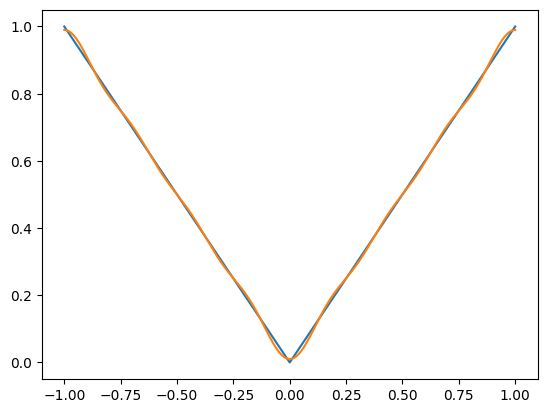

In [7]:
# y(x) = |x|, -1 \le x \le 1$ ($L_0 = 2$)
xx = -1:0.005:1
yy = abs.(xx)
yy1 = fourierseries.(xx, L0, a0, Ref(a), Ref(b))
plot(xx, yy)
plot(xx, yy1);

## Problemas digitais:

O que nós temos: 
$$
y_j, \Delta x, \quad\longrightarrow\quad x_{j+1}-x_j = \Delta x =\frac{L_0}{Q} \qquad 0\le j < Q
$$
não temos os valores de $x_n$ exatos. Então podemos assumir $x_j = j \Delta x$:
\begin{align}
 a_n &= \frac{2}{Q} \sum_{j=0}^{Q-1} y_j \cos\left(\frac{2\pi n x_j}{L_0}\right) = 
 \frac{2}{Q} \sum_{j=0}^{Q-1} y_j \cos\left(\frac{2\pi n j \Delta x}{Q\cdot\Delta x}\right) = 
 \frac{2}{Q} \sum_{j=0}^{Q-1} y_j \cos\left(\frac{2\pi n j}{Q}\right) \\
 b_n &= \frac{2}{Q} \sum_{j=0}^{Q-1} y_j \sin\left(\frac{2\pi n x_j}{L_0}\right) = 
 \frac{2}{Q} \sum_{j=0}^{Q-1} y_j \sin\left(\frac{2\pi n j}{Q}\right) 
\end{align}


# Forma complexa da série de Fourier

$$
c_n = \left\{ \begin{matrix}
\frac{a_0}{2} & n = 0 \\
\frac{1}{2}\left(a_n - i b_n\right) & n > 0\\
\frac{1}{2}\left(a_n + i b_n\right) & n < 0
\end{matrix}\right.
$$
$$
f(x) = \sum_{n=-N}^N c_n \exp\left(\frac{2\pi i n x}{L_0} \right) \qquad 
c_n = \frac{1}{L_0}\int_0^{L_0} f(x) \exp\left(-\frac{2\pi i n x}{L_0} \right)\:dx
$$
Se $f(x)$ for uma função real, para $n$ positivo:
$$
\begin{matrix}
c_n + c_{-n} = a_n\\
c_n - c_{-n} = -i b_n
\end{matrix}
\longrightarrow
c_n = c^*_{-n}
$$

## DFT - Transformada de Fourier discreta

$$
c_n = \frac{1}{L_0}\int_0^{L_0} f(x) \exp\left(-\frac{2\pi i\cdot n x}{L_0} \right)\:dx \approx \frac{1}{\Delta x \cdot Q}\sum_{j=0}^{Q-1} y_j \exp\left(-\frac{2\pi i \cdot n j\Delta x}{Q\cdot \Delta x} \right)\cdot\Delta x
$$

Portanto, 
$$
c_n = \frac{1}{Q}\sum_{j=0}^{Q-1} y_j \exp\left(-\frac{2\pi i\cdot n j}{Q} \right)
$$


# DFT - Discrete Fourier Transform

$$
c_n = X_n = \frac{1}{N}\sum_{k=0}^{N-1} x_k \exp\left(-\frac{2\pi n k}{N} \right)
$$

Chamando 
$$
w_k = w^k = \exp\left(-\frac{2\pi k}{N}\right)
$$
Repare que isto pode ser escrito como uma multiplicação de matrizes:

$$
\left(\begin{matrix} X_0 \\ X_1 \\ \vdots \\ X_{N-1}\end{matrix} \right)
= 
\left(\begin{matrix} 1 & 1 & \cdots & 1\\
1 & w & \cdots & w^{N-1} \\
\vdots & \vdots & \ddots &\vdots \\
1 & w^N & \cdots & w^{(N-1)^2}\\
\end{matrix}\right) 
\cdot 
\left(\begin{matrix} x_0 \\ x_1 \\ \vdots \\ x_{N-1}\end{matrix} \right) 
$$




## FFT - Transformada Rápida de Fourier


Um algorítmo rápido para
$$
\sum_{j=0}^{Q-1} y_j \exp\left(-\frac{2\pi i\cdot n j}{Q} \right)
$$

Se $0\le n\le Q$, o custo computacional é $\mathcal{O}(Q^2)$.

FFT: custo cai para $\mathcal{O}(Q\cdot\log Q)$

Originalmente, só funcionava com $Q$ igual a potências de 2.


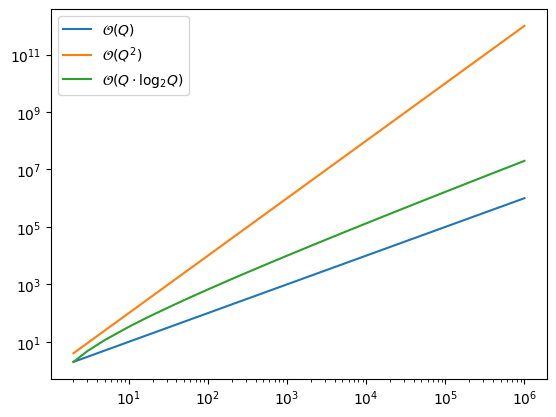

PyObject <matplotlib.legend.Legend object at 0x7fdca5b24ee0>

In [8]:
Q = [2, 3, 5, 10, 15, 20, 40, 60, 80, 100, 150, 200, 300, 500, 700, 1000, 2000, 5000, 10000,
20000, 30000, 50000, 100000, 200000, 500000, 1000000]
t1 = Q
t2 = Q.^2
tlog = Q .* log2.(Q);
loglog(Q, t1, label="\$\\mathcal{O}(Q)\$")
plot(Q, t2, label="\$\\mathcal{O}(Q^2)\$")
plot(Q, tlog, label="\$\\mathcal{O}(Q\\cdot\\log_2 Q)\$")
legend()


## FFTW - Fastest Fourier Transform of the West

In [9]:
## Pkg.add("FFTW")
using FFTW

In [10]:
L₀ = 1.0; Q = 4; freq=1
x = range(0.0, L₀, length=Q+1)[1:Q]
y = sin.(freq.*2π.*x); f = (0:Q-1) / L₀
Y = 1/Q * fft(y)

4-element Array{Complex{Float64},1}:
  3.061616997868383e-17 + 0.0im
 -3.061616997868383e-17 - 0.5im
  3.061616997868383e-17 + 0.0im
 -3.061616997868383e-17 + 0.5im

## Exemplos

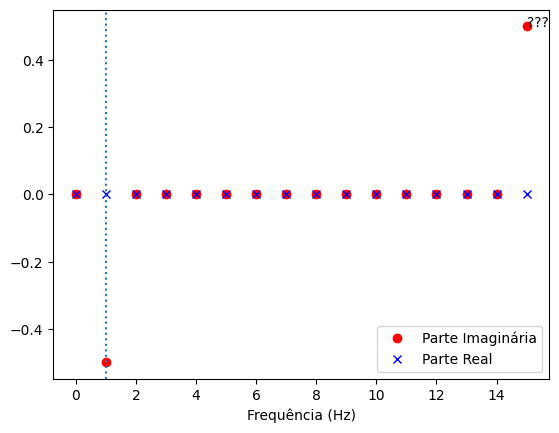

PyObject <matplotlib.legend.Legend object at 0x7fdc9eb40b50>

In [11]:
L₀ = 1.0; Q = 16; freq=1
x = range(0.0, L₀, length=Q+1)[1:Q]
y = sin.(freq.*2π.*x); f = (0:Q-1) / L₀
Y = 1/Q * fft(y)
plot(f, imag.(Y), "ro", label="Parte Imaginária")
plot(f, real.(Y), "bx", label="Parte Real")
xlabel("Frequência (Hz)"); axvline(freq, linestyle=":")
annotate("???", (f[Q], imag(Y[Q])))
legend()

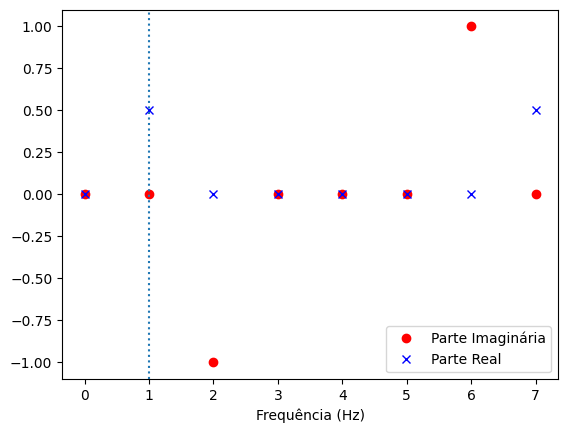

PyObject <matplotlib.legend.Legend object at 0x7fdc9eaff5b0>

In [12]:
L₀ = 1.0; Q = 8; freq=1
x = range(0.0, L₀, length=Q+1)[1:Q]; f = (0:Q-1) / L₀

y = cos.(freq.*2π.*x) + 2*sin.(2*freq.*2π.*x)

Y = 1/Q * fft(y)
plot(f, imag.(Y), "ro", label="Parte Imaginária")
plot(f, real.(Y), "bx", label="Parte Real")
xlabel("Frequência (Hz)"); axvline(freq, linestyle=":")
legend()

In [13]:
fftfreq(Q) * Q

8-element Array{Float64,1}:
  0.0
  1.0
  2.0
  3.0
 -4.0
 -3.0
 -2.0
 -1.0

## A DFT é periódica (aliasing)!

Sejam os pontos $y_j$, $0 \le j < N$:

$$
Y_k = \frac{1}{N}\sum_{j=0}^{N-1} y_j\exp\left(-\frac{2\pi i j k}{N}\right)
$$
$$
Y_{N+k} = \frac{1}{N}\sum_{j=0}^{N-1} y_j\exp\left[-\frac{2\pi i j (k+N)}{N}\right] = 
\frac{1}{N}\sum_{j=0}^{N-1} y_je^{-2\pi i j}\exp\left(-\frac{2\pi i j k}{N}\right)
$$
$$
Y_{N+k} = \frac{1}{N}\sum_{j=0}^{N-1} y_j\exp\left(-\frac{2\pi i j k}{N}\right) = Y_k
$$


## Exemplo de Aliasing

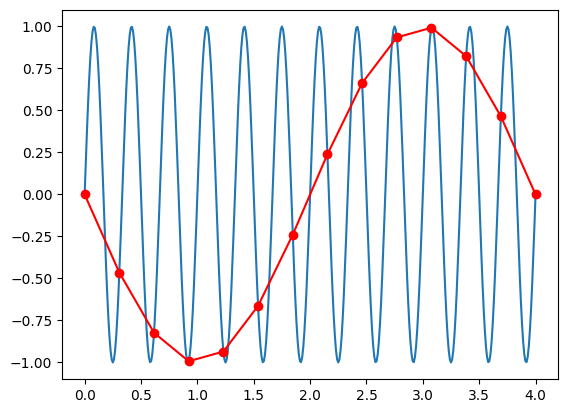

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdc9ea9c370>

In [14]:
ncyc = 4; Q = 13; T₀ = 1; g(t) = sin(3*2π * t)
t = range(0, ncyc, length=Q+1); x = g.(t)
t0 = 0:0.01:ncyc; x0 = g.(t0)
plot(t0, x0); plot(t, x, "ro-")



## O que acontece com frequências negativas (quando $y_j$ é real)?

E se o $y_j$ forem reais?
$$
Y_{-k} = \frac{1}{N}\sum_{j=0}^{N-1} y_j\exp\left(\frac{2\pi i j k}{N}\right) = Y^*_k
$$

Mas lembre-se que $Y$ também é periódico:

$$
Y_{-k} = Y_{N-k} = Y^*_k
$$

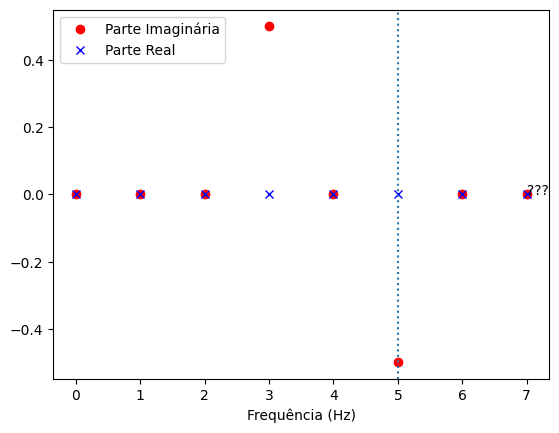

PyObject <matplotlib.legend.Legend object at 0x7fdcb4fd2100>

In [15]:
L₀ = 1.0; Q = 8; freq=5
x = range(0.0, L₀, length=Q+1)[1:Q]
y = sin.(freq.*2π.*x); f = (0:Q-1) / L₀
Y = 1/Q * fft(y)
plot(f, imag.(Y), "ro", label="Parte Imaginária")
plot(f, real.(Y), "bx", label="Parte Real")
xlabel("Frequência (Hz)"); axvline(freq, linestyle=":")
annotate("???", (f[Q], imag(Y[Q])))
legend()

## Qual o número de frequencias relevantes?

 * Q números reais
 * `fft` gera Q números complexos - 2 $\times$ vezes mais informação
 * A frequência 0 sempre vai corresponder a um número real (a média)!
 
### Q é um número ímpar
  * $a_0$
  * $(Q-1)/2\:\longrightarrow\:a_n$
  * $(Q-1)/2\:\longrightarrow\:b_n$

### N é um número par
 * $a_0$
 * $Q/2\:\longrightarrow\:a_n$
 * $Q/2\:\longrightarrow\:b_n$ mas $b_{1+Q/2} = 0$

$$
N_\text{relevante} = \frac{Q}{2} + 1
$$


In [16]:
#nfftutil(N) = (N % 2 == 0) ? (div(N,2) + 1) : div(N+1,2)
nfftutil(N) = div(N,2) + 1


nfftutil (generic function with 1 method)

In [17]:
div(3,2)
3 % 2

1

In [18]:
nfftutil(3)

2

In [19]:
nfftutil(4)

3

In [20]:
nfftutil(5)

3

In [21]:
nfftutil(6)

4

## `rfft`: especializado para números reais

In [22]:
Q = 6
x = rand(Q) .+ 10
println(sum(x))
X = rfft(x)


64.32486796593503


4-element Array{Complex{Float64},1}:
    64.32486796593503 + 0.0im
 -0.05102229399856828 + 0.6832587292617861im
 0.023004050822528654 - 0.3227015418884201im
  -0.8993776580689623 + 0.0im

In [23]:
X = fft(x)

6-element Array{Complex{Float64},1}:
    64.32486796593503 + 0.0im
 -0.05102229399856828 + 0.6832587292617861im
 0.023004050822528654 - 0.3227015418884201im
  -0.8993776580689623 + 0.0im
 0.023004050822528654 + 0.3227015418884201im
 -0.05102229399856828 - 0.6832587292617861im

## Interpolação trigonométrica

In [24]:
struct TrigInterp
    Q::Int
    dx::Float64
    c::Vector{ComplexF64}
end
TrigInterp(x::Vector{Float64}, dx) = TrigInterp(length(x), dx, rfft(x))

function interp(f::TrigInterp, x)
    y = real(f.c[1])/2
    Q = f.Q
    P = Q * f.dx
    N = length(f.c)
    for k in 1:N-1
        c = f.c[k+1]
        y += real(c) * cos(2π*k*x/P) - imag(c) * sin(2π*k*x)
    end
    
    return 2y/Q
end

(f::TrigInterp)(x) = interp(f, x)

## Exemplo

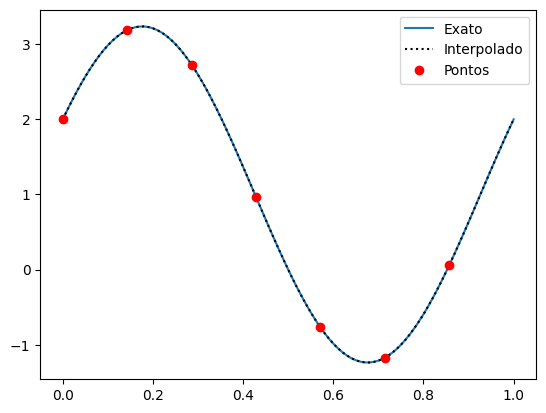

PyObject <matplotlib.legend.Legend object at 0x7fdc9eb1b1c0>

In [25]:
Q = 7; L₀ = 1.0; 
x0 = range(0, L₀, length=Q+1)[1:Q]
f = x->(2*(sin(2π*x)) + 1.0 + cos(2π*x))
y0 = f.(x0)
Y = TrigInterp(y0, L₀/Q)
x = 0:0.01:L₀; y = Y.(x);
plot(x, f.(x), label="Exato")
plot(x, y, "k:", label="Interpolado")
plot(x0, y0, "ro", label="Pontos")
legend()




## E usando fft (não rfft)?

In [26]:
struct TrigInterp0
    Q::Int
    dx::Float64
    c::Vector{ComplexF64}
end
TrigInterp0(x::Vector{Float64}, dx) = TrigInterp0(length(x), dx, fft(x))

function interp(f::TrigInterp0, x)
    y = real(f.c[1])/2
    Q = f.Q
    P = Q * f.dx
    N = nfftutil(length(f.c))
    for k in 1:N-1
        c = f.c[k+1]
        y += real(c) * cos(2π*k*x/P) - imag(c) * sin(2π*k*x)
    end
    
    return 2y/Q
end

(f::TrigInterp0)(x) = interp(f, x)

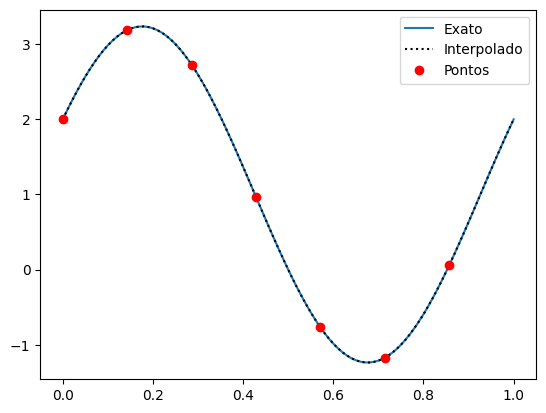

PyObject <matplotlib.legend.Legend object at 0x7fdc9bccb6d0>

In [27]:
Y = TrigInterp0(y0, L₀/Q)
x = 0:0.01:L₀; y = Y.(x);
plot(x, f.(x), label="Exato")
plot(x, y, "k:", label="Interpolado")
plot(x0, y0, "ro", label="Pontos")
legend()


## Transformação inversa

In [28]:
x = rand(4)
X = fft(x)
x1 = ifft(X)
x1 .- x

4-element Array{Complex{Float64},1}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [29]:
Y = rfft(x)
x2 = irfft(Y, 4)
x2 .- x

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

## Resample

In [30]:

function myresample(y, Qout)
    Qin = length(y)
    Nin = Qin ÷ 2 + 1
    Nout = Qout ÷ 2 + 1
    
    Yin = rfft(y)
    Yout = zeros(ComplexF64, Nout)
    nmin = min(Nout, Nin)
    for i in 1:nmin
        Yout[i] = Qout/Qin * Yin[i]
    end
    
    
    if Qout > Qin  # interpolação
        if iseven(Qin)
            Yout[Nin] /= 2
        end
    elseif Qout < Qin
        if iseven(Qin)
            Yout[Nout] = 2*real(Yout[Nout])
        end
    end
    
    return irfft(Yout, Qout)
end
   

myresample (generic function with 1 method)

## Usando `myresample`

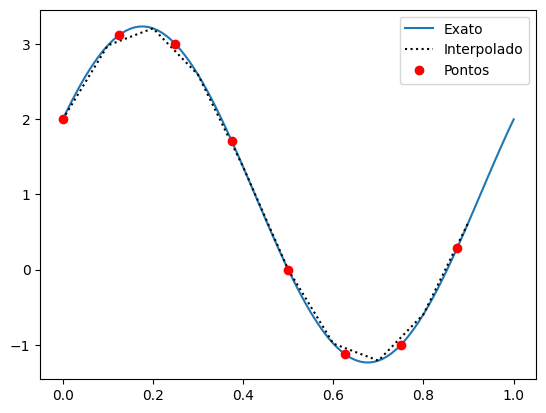

PyObject <matplotlib.legend.Legend object at 0x7fdc9bca8be0>

In [31]:
Q = 8; L₀ = 1.0; 
x0 = range(0, L₀, length=Q+1)[1:Q]; x = 0:0.01:L₀
f = x->(2*sin(2π*x) + 1.0 + cos(2π*x))
y0 = f.(x0)
Qout = 10
y1 = myresample(y0, Qout);
x1 = range(0, L₀, length=Qout+1)[1:Qout]
plot(x, f.(x), label="Exato")
plot(x1, y1, "k:", label="Interpolado")
plot(x0, y0, "ro", label="Pontos")
legend()


## Outros formatos


In [32]:
x = rand(4)
X1 = fft(x)
X2 = copy(X)
fft!(X2)

4-element Array{Complex{Float64},1}:
  2.696840093674516 + 0.0im
 0.6096228197517748 + 0.0im
 2.0509948408906125 + 0.0im
  2.618050977379867 + 0.0im

O mesmo para `ifft`, `rfft`, etc!

## Lembra que a DFT era uma multiplicação de matrizes?

In [33]:
x = rand(4)
P = plan_fft(x, flags=FFTW.ESTIMATE)

X1 = P * x

4-element Array{Complex{Float64},1}:
  2.2606423628078156 + 0.0im
 -0.8363595278420679 - 0.1408644287536589im
  -0.577655517107104 + 0.0im
 -0.8363595278420679 + 0.1408644287536589im

In [34]:
fft(x)

4-element Array{Complex{Float64},1}:
  2.2606423628078156 + 0.0im
 -0.8363595278420679 - 0.1408644287536589im
  -0.577655517107104 + 0.0im
 -0.8363595278420679 + 0.1408644287536589im

## Transformada inversa

In [35]:
P \ X1

4-element Array{Complex{Float64},1}:
 0.002566947504143935 + 0.0im
   0.7800066843555593 + 0.0im
   0.8389264753462118 + 0.0im
   0.6391422556019004 + 0.0im

In [36]:
ifft(X1)

4-element Array{Complex{Float64},1}:
 0.002566947504143935 + 0.0im
   0.7800066843555593 + 0.0im
   0.8389264753462118 + 0.0im
   0.6391422556019004 + 0.0im

## Outros tipos de transformadas

 * Cosseno: `dct`, `idct`
 * Mais genérica: `r2r` (ver <www.fftw.org>)
 * Tudo o que foi feito até aqui, vale para problemas multidimensionais!

## Conclusões

Algumas questões
 
 * Será que esta série converge para a função original?
 * Em que condições esta série converge?
 * Quão rápido se dá esta convergência?
 * O que acontece quando $N\longrightarrow\infty$?
 
Respostas genéricas
 * A série converge para condições bem amplas, inclusive se houver discontinuidades na função.
 * Esta convergência se dá para $N\longrightarrow\infty$. Para valor de $N$ finito, as coisas são mais complicadas (como veremos adiante).
 * Para funções periódicas e suaves, não existe aproximação melhor!!!

# Problemas


## Problema 1

Seja a seguinte função definida no domínio $-1 < x \le 1$:

$$
y(x) = \left\{\begin{matrix} -1 & x < 0 \\ 1 & x > 0\\ 0 & x=0\end{matrix}\right.
$$

 1. Ache os coeficientes $a_n$ e $b_n$ da série de Fourier
 2. Plote a série de Fourier para diferentes números de termos da série de Fourier. Percebe algo estranho?
 3. Qual a relação desta função com a função $y = |x|$ que estudamos anteriormente?
 4. Escolha diferentes números de pontos e interpole esta função nestes pontos

## Problema 2

Verifique a ortogonalidade discreta da base trigonométrica, ou seja, 

$$
\sum_{i=0}^Q \phi_n(x_i)\cdot \phi_k(x_i)=0 \qquad k\ne n, k+n \text{ e } k-n \text{ não são múltiplos de}\: Q/2
$$

para 

\begin{align}
\phi_0(x) &= \frac{1}{2}\\
\phi_n(x) &= \cos\left(\frac{2\pi n x}{L_0}\right) \qquad 0\le n \le N \\
\phi_{n+N}(x) &= \sin\left(\frac{2\pi n x}{L_0}\right) \qquad 1\le n \le N 
\end{align}



## Problema 3

Nos exemplos iniciais usando a DFT, ao se escolher os pontos, foi utilizado o seguinte código:
```julia
L₀ = 1.0; Q = 16; freq=1
x = range(0.0, L₀, length=Q+1)[1:Q]
```
O que acontece se utilzarmos a expressão mais simples a seguir?
```julia
x = range(0.0, L₀, length=Q)
```
O que está acontecendo? Você consegue explicar?

In [ ]:
L₀ = 1.0; Q = 16; freq=1; 
x = range(0.0, L₀, length=Q)
y = sin.(freq.*2π.*x); f = (0:Q-1) / L₀
Y = 1/Q * fft(y);
#plot(f, real.(Y), "xb")
#plot(f, imag.(Y), "ro")

## Problema 4

Implemente a DFT usando a definição. Verifique como aumenta o custo computacional quando o número de pontos aumenta. 


## Problema 5

(Desafio) procure na net ou em algum livro como implementar a FFT. Tente!

## Problema 6

A transformada de Fourier está diretamente relacionada com a série de Fourier e é dada por:

$$
X(\omega) = \frac{1}{2\pi} \int_{-\infty}^\infty x(t)e^{-i\omega t}\: dt
$$

 1. Calcula a transformada de Fourier para a função 
  $$
  x(t) = \left\{\begin{matrix} 1 & -1 < x < 1 \\ 0 & x \ge 1\end{matrix}\right.
  $$
 2. Discretize a função e use a FFT para calcular a transformada.
 3. Tente verificar o que acontece se você adiciona zeros à esquerda e à direita da função discretizada.


## Problema 7

Faça alguns exemplos do pacote `ApproxFun` (<https://github.com/JuliaApproximation/ApproxFun.jl>)
